<a href="https://colab.research.google.com/github/qutren2108/Sustainability_LC-NC/blob/main/Energy_Monitoring_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import networkx as nx

# energy workflow trial
G2 = nx.DiGraph()

# task list
energy_tasks = {
    1: "Collect meter readings",
    2: "Validate sensor data",
    3: "Detect anomalies",
    4: "Classify usage level",
    5: "Send alert if anomaly",
    6: "Store data in dashboard",
    7: "Generate weekly summary report"
}

# add tasks
for t in energy_tasks:
    G2.add_node(t, label=energy_tasks[t])

# define flow links
edges_energy = [
    (1, 2),
    (2, 3),
    (3, 4),
    (3, 6),
    (4, 5),
    (6, 7)
]
G2.add_edges_from(edges_energy)


In [9]:
import random

# give each task a random time + CPU load
for n in G2.nodes():
    G2.nodes[n]['exec_time'] = round(random.uniform(2, 8), 2)     # seconds
    G2.nodes[n]['cpu'] = round(random.uniform(0.2, 0.9), 2)       # fraction of 1 CPU

# preview to make sure it's assigned
for n in G2.nodes(data=True):
    print(f"{n[1]['label']} → Time: {n[1]['exec_time']}s, CPU: {n[1]['cpu']}")


Collect meter readings → Time: 5.66s, CPU: 0.65
Validate sensor data → Time: 5.45s, CPU: 0.62
Detect anomalies → Time: 3.48s, CPU: 0.57
Classify usage level → Time: 2.37s, CPU: 0.22
Send alert if anomaly → Time: 5.63s, CPU: 0.7
Store data in dashboard → Time: 7.39s, CPU: 0.74
Generate weekly summary report → Time: 3.46s, CPU: 0.7


In [10]:
import pandas as pd

# get the task order from the DAG
order_energy = list(nx.topological_sort(G2))

# init counters
total_time_energy = 0
total_energy_energy = 0
results_energy = []

# simulate each task
for n in order_energy:
    t = G2.nodes[n]['exec_time']
    c = G2.nodes[n]['cpu']
    energy = (t / 3600) * c * 50  # assuming 50W CPU

    total_time_energy += t
    total_energy_energy += energy

    results_energy.append({
        "Task": G2.nodes[n]['label'],
        "Time (s)": t,
        "CPU": c,
        "Energy (kWh)": round(energy, 6)
    })

# total row
results_energy.append({
    "Task": "TOTAL",
    "Time (s)": round(total_time_energy, 2),
    "CPU": "",
    "Energy (kWh)": round(total_energy_energy, 6)
})

# make into table
df_energy = pd.DataFrame(results_energy)
print(df_energy)


                             Task  Time (s)   CPU  Energy (kWh)
0          Collect meter readings      5.66  0.65      0.051097
1            Validate sensor data      5.45  0.62      0.046931
2                Detect anomalies      3.48  0.57      0.027550
3            Classify usage level      2.37  0.22      0.007242
4         Store data in dashboard      7.39  0.74      0.075953
5           Send alert if anomaly      5.63   0.7      0.054736
6  Generate weekly summary report      3.46   0.7      0.033639
7                           TOTAL     33.44            0.297147


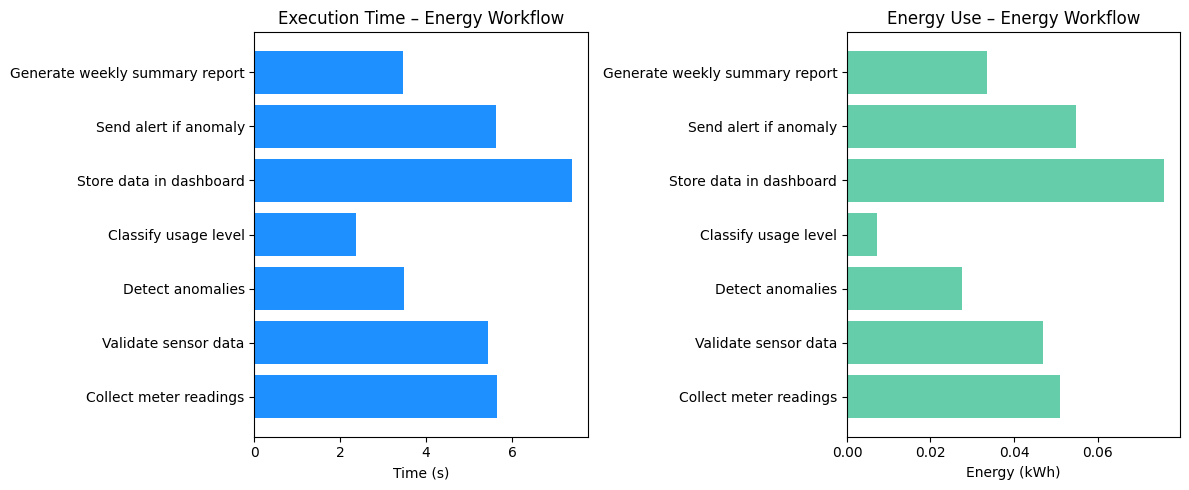

In [11]:
import matplotlib.pyplot as plt

# skip total row for chart
task_labels_energy = [r['Task'] for r in results_energy[:-1]]
times_energy = [r['Time (s)'] for r in results_energy[:-1]]
energy_use_energy = [r['Energy (kWh)'] for r in results_energy[:-1]]

plt.figure(figsize=(12, 5))

# Time per task
plt.subplot(1, 2, 1)
plt.barh(task_labels_energy, times_energy, color='dodgerblue')
plt.title("Execution Time – Energy Workflow")
plt.xlabel("Time (s)")

# Energy per task
plt.subplot(1, 2, 2)
plt.barh(task_labels_energy, energy_use_energy, color='mediumaquamarine')
plt.title("Energy Use – Energy Workflow")
plt.xlabel("Energy (kWh)")

plt.tight_layout()
plt.show()


In [12]:
# copy the graph to simulate improved version
G2_opt = G2.copy()

# apply time and CPU reduction
for n in G2_opt.nodes():
    G2_opt.nodes[n]['exec_time'] = round(G2_opt.nodes[n]['exec_time'] * random.uniform(0.6, 0.8), 2)
    G2_opt.nodes[n]['cpu'] = round(G2_opt.nodes[n]['cpu'] * random.uniform(0.6, 0.8), 2)

# simulate optimized workflow
order_opt_energy = list(nx.topological_sort(G2_opt))
total_time_opt_energy = 0
total_energy_opt_energy = 0
results_opt_energy = []

for n in order_opt_energy:
    t = G2_opt.nodes[n]['exec_time']
    c = G2_opt.nodes[n]['cpu']
    energy = (t / 3600) * c * 50

    total_time_opt_energy += t
    total_energy_opt_energy += energy

    results_opt_energy.append({
        "Task": G2_opt.nodes[n]['label'],
        "Time (s)": t,
        "CPU": c,
        "Energy (kWh)": round(energy, 6)
    })

results_opt_energy.append({
    "Task": "TOTAL (Optimized)",
    "Time (s)": round(total_time_opt_energy, 2),
    "CPU": "",
    "Energy (kWh)": round(total_energy_opt_energy, 6)
})

# show table
df_opt_energy = pd.DataFrame(results_opt_energy)
print(df_opt_energy)


                             Task  Time (s)   CPU  Energy (kWh)
0          Collect meter readings      4.32  0.48      0.028800
1            Validate sensor data      3.38   0.5      0.023472
2                Detect anomalies      2.72  0.37      0.013978
3            Classify usage level      1.86  0.16      0.004133
4         Store data in dashboard      4.97  0.49      0.033824
5           Send alert if anomaly      3.64  0.44      0.022244
6  Generate weekly summary report      2.35  0.43      0.014035
7               TOTAL (Optimized)     23.24            0.140486


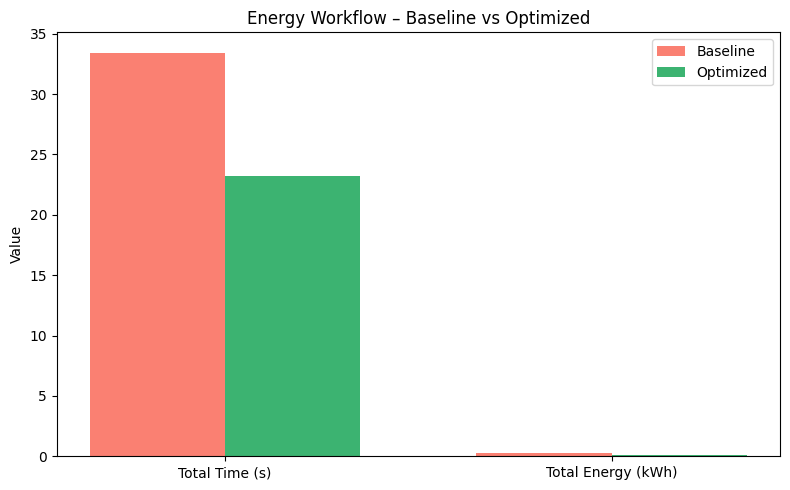

In [13]:
import numpy as np

# get total values
base_time = df_energy[df_energy['Task'] == 'TOTAL']['Time (s)'].values[0]
base_energy = df_energy[df_energy['Task'] == 'TOTAL']['Energy (kWh)'].values[0]

opt_time = df_opt_energy[df_opt_energy['Task'] == 'TOTAL (Optimized)']['Time (s)'].values[0]
opt_energy = df_opt_energy[df_opt_energy['Task'] == 'TOTAL (Optimized)']['Energy (kWh)'].values[0]

# data for chart
labels = ['Total Time (s)', 'Total Energy (kWh)']
baseline_vals = [base_time, base_energy]
optimized_vals = [opt_time, opt_energy]

x = np.arange(len(labels))
width = 0.35

# draw bar chart
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, baseline_vals, width, label='Baseline', color='salmon')
plt.bar(x + width/2, optimized_vals, width, label='Optimized', color='mediumseagreen')

plt.title("Energy Workflow – Baseline vs Optimized")
plt.xticks(x, labels)
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()
